# Explainable Boosting Machines (EBM)

In [10]:
# Importing the libraries

from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.data import Marginal
from interpret.perf import RegressionPerf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load

In [17]:
# Model

ebm_model = load('ebm_model_optimized.joblib')

In [18]:
TEST_SIZE = 0.1
RANDOM_SEED = 24

In [19]:
df = pd.read_csv('material_data.csv')

FEATURES = ['nuclear_charge', 'covalent_radius', 'electronegativity', 'electron_affinity', 'nuclear_charge_max', 'nuclear_charge_min', 'covalent_radius_max', 'covalent_radius_min', 'electronegativity_max', 'electronegativity_min', 'electron_affinity_max', 'electron_affinity_min', 'ionization_energy', 'ionization_energy_max', 'ionization_energy_min', 'Cr+', 'Cr-', 'Cr*', 'Cr÷', 'E+', 'E-', 'E*', 'E÷', 'EA+', 'EA-', 'EA*', 'EA÷', 'I+', 'I-', 'I*', 'I÷']
TARGET = ['ef']

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna() 

X = df.reindex(FEATURES, axis=1)
y = df.reindex(TARGET, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [20]:
performance = RegressionPerf(ebm_model).explain_perf(X_test, y_test, name="Performance")
show(performance)

<!-- http://127.0.0.1:7001/2880200515952/ -->

In [21]:
explanation = ebm_model.explain_global()
show(explanation)

<!-- http://127.0.0.1:7001/2880320861568/ -->

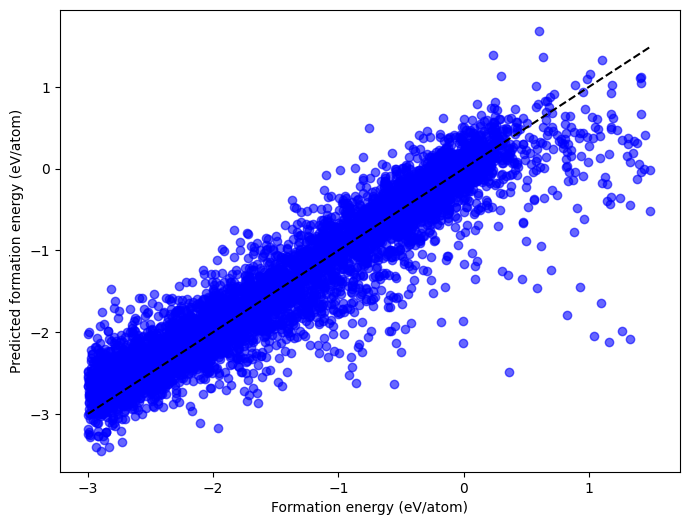

In [22]:
# Correlation scatter plot of formation energies

pred = ebm_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.6, color='b')
plt.plot([min(df['ef']), max(df['ef'])], [min(df['ef']), max(df['ef'])], 'k--')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Predicted formation energy (eV/atom)')
plt.show()